In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy import units as u
from astropy import constants as const

In [2]:
# data for UGC02369
redshift = 0.032
xdata = np.array([8,12,24,25,60,70,100,160,450,850])
ydata = np.array([0.149,0.230,1.160,1.880,8.070,7.823,11.18,8.717,0.523,0.072])
yerr = np.array([0.004,0.022,0.058,0.042,0.043,1.173,0.190,2.615,0.120,0.013])

In [3]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [110]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [4]:
def Greybody(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for dust-dominated FIR regime
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1)
    return flux

In [5]:
def PL(x,Lc,Npl):
    '''Flux density in Jy at wavelength x in micron
    for PAH-dominated MIR regime
    given by a power-law
    Lc is the turnover wavelength 
    Nbl is a normalization parameter'''
    alpha = 2.0
    flux = Npl*np.exp(-(x/(Lc*3/4))**2)*(x/Lc)**alpha
    return flux

In [ ]:
#From cmcirsed:
#      p0 = 4.0        #best starting guess for N_bb
#      p1 = 30         #best starting guess for Tdust
#      p2 = betavalue  #best starting guess for beta
#      p4 = alphavalue #best starting guess for alpha
#      npl = p0  + alog10(1-exp(-(200.*((26.6764 + 6.24629 * p4)^(-2.) + (0.000190530 + 7.24277e-05 * p4)*p1))^p2)) 
#                + 3.*alog10((26.6764 + 6.24629 * p4)^(-2.) + (0.000190530 + 7.24277e-05 * p4)*p1) 
#                - alog10(exp(14393.9*((26.6764 + 6.24629 * p4)^(-2.) + (0.000190530 + 7.24277e-05 * p4)*p1)/(p1))-1.)

In [6]:
popt1, pcov1 = curve_fit(GreybodyPL,xdata/(1+redshift),ydata,p0=[30,10**4])
print(popt1)

[4.48666052e+01 2.78519932e+08]


In [7]:
((26.68 + 2*6.246)**-2 + (1.905*(10**-4) + 2*7.243*(10**-5))*44.866)**-1

63.70253285271913

In [10]:
#((1-np.exp(-(200*93.3)**1.5))*(93.3**3))/(np.exp(14387.8*93.3*25.5)-1)
popt1[1]*((1-np.exp(-(200/63.7)**1.5))*(63.7**-3))/(np.exp(14387.8/(63.7*44.866))-1)

7.034682432609176

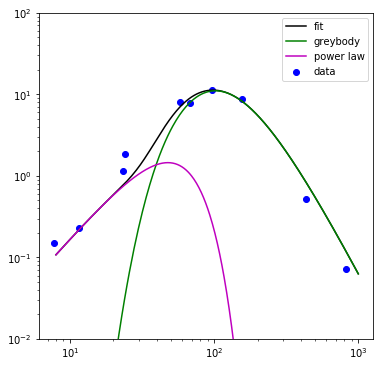

In [13]:
fig,axs = plt.subplots(figsize=(6,6))
array = np.linspace(8,1000,1000)
axs.scatter(xdata/(1+redshift),ydata,c='b',label='data')
axs.plot(array,GreybodyPL(array,popt1[0],popt1[1]),c='k',label='fit')
axs.plot(array,Greybody(array,popt1[0],popt1[1]),c='g',label='greybody')
axs.plot(array,PL(array,63.7,7.03),c='m',label='power law')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(ymin=0.01,ymax=100)
axs.legend(numpoints=1,loc='best')
plt.show()

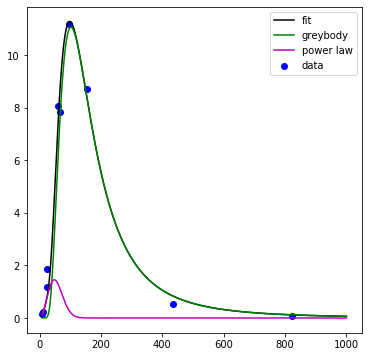

In [14]:
fig,axs = plt.subplots(figsize=(6,6))
array = np.linspace(8,1000,1000)
axs.scatter(xdata/(1+redshift),ydata,c='b',label='data')
axs.plot(array,GreybodyPL(array,popt1[0],popt1[1]),c='k',label='fit')
axs.plot(array,Greybody(array,popt1[0],popt1[1]),c='g',label='greybody')
axs.plot(array,PL(array,63.7,7.03),c='m',label='power law')
#axs.set_xscale('log')
#axs.set_yscale('log')
#axs.set_ylim(ymin=0.01,ymax=100)
axs.legend(numpoints=1,loc='best')
plt.show()

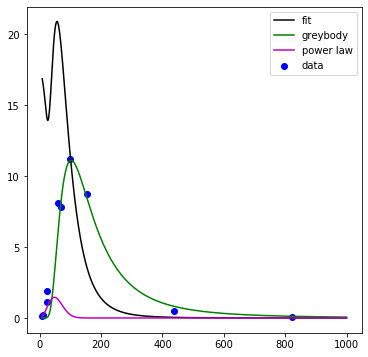

In [27]:
fig,axs = plt.subplots(figsize=(6,6))
array = np.linspace(8,1000,1000)
axs.scatter(xdata/(1+redshift),ydata,c='b',label='data')
axs.plot(array,(10**4)*GreybodyPL(array,popt1[0],popt1[1])/array**2,c='k',label='fit')
axs.plot(array,Greybody(array,44.9,2.79*10**8),c='g',label='greybody')
axs.plot(array,PL(array,63.7,7.06),c='m',label='power law')
#axs.set_xscale('log')
#axs.set_yscale('log')
#axs.set_ylim(ymin=0.01,ymax=100)
axs.legend(numpoints=1,loc='best')
plt.show()

## Obtaining Teff

In [15]:
from scipy.optimize import minimize_scalar

In [17]:
res = minimize_scalar(lambda x: -GreybodyPL(x,popt1[0],popt1[1]),bounds=(1,1000),method='bounded')#,args=(popt[0],popt[1]))
res.x

98.20409452510172

In [19]:
Teff = 2.898*(10**3)/res.x # effective temperature in Kelvin as given by Wein's displacement law
                           # note Casey 2012 gives 31.2 K as the temperature for UGC02369
Teff

29.509971188209967

## Integrating to get LIR

### Integrating the analytical expression of the flux

In [20]:
from scipy.integrate import quad
#Integrate the Greybody function to get total IR flux,
#then multiply by 4piDl^2 to get LIR
##INTEGRATE AS A FUNCTION OF WAVELENGTH, NOT FREQUENCY!!!!

In [118]:
dist_factor = 4*np.pi*(127.7*(10**6)*const.pc)**2 #distance is 127.7 Mpc
dist_factor

<Quantity 1.95115939e+50 m2>

In [21]:
const.pc

<<class 'astropy.constants.iau2015.IAU2015'> name='Parsec' value=3.0856775814671916e+16 uncertainty=0.0 unit='m' reference='Derived from au'>

In [23]:
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [119]:
i1, abserr1 = quad(lambda x: GreybodyPL(x,popt1[0],popt1[1])/(x**2),8,1000) # c/lambda^2 factor gives flux per unit of wavelength
i1*u.Jansky/u.micron

<Quantity 0.20933374 Jy / micron>

In [120]:
(const.c*i1*dist_factor*u.Jansky/u.micron).si

<Quantity 1.22448277e+38 J / s>

In [121]:
(const.c*i1*dist_factor*u.Jansky/u.micron).si/const.L_sun

<Quantity 3.19875331e+11 J / (s W)>

In [122]:
i1*3*(10**8)*(10**-26)*(10**6)*dist_factor.value/(3.828*10**26)

320096776562.4394

In [123]:
# note Casey 2012 gives log(LIR) as 11.69
np.log10(i1*3*(10**8)*(10**-26)*(10**6)*dist_factor.value/(3.828*10**26))

11.505281300735216

### Another method: constructing an SED array

In [31]:
wl = np.arange(8,1001)
(wl-1)*u.micron

<Quantity [  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
            17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
            27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
            37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
            47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
            57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
            67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
            77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
            87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
            97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
           107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
           117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
           127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
           137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
      

In [33]:
nu = const.c/(wl*u.micron)
# same as (wl*u.micron).to(u.Hz, equivalencies=u.spectral())
nu.to(u.Hz)

<Quantity [3.74740572e+13, 3.33102731e+13, 2.99792458e+13, 2.72538598e+13,
           2.49827048e+13, 2.30609583e+13, 2.14137470e+13, 1.99861639e+13,
           1.87370286e+13, 1.76348505e+13, 1.66551366e+13, 1.57785504e+13,
           1.49896229e+13, 1.42758313e+13, 1.36269299e+13, 1.30344547e+13,
           1.24913524e+13, 1.19916983e+13, 1.15304792e+13, 1.11034244e+13,
           1.07068735e+13, 1.03376710e+13, 9.99308193e+12, 9.67072445e+12,
           9.36851431e+12, 9.08461994e+12, 8.81742524e+12, 8.56549880e+12,
           8.32756828e+12, 8.10249886e+12, 7.88927521e+12, 7.68698610e+12,
           7.49481145e+12, 7.31201117e+12, 7.13791567e+12, 6.97191763e+12,
           6.81346495e+12, 6.66205462e+12, 6.51722735e+12, 6.37856294e+12,
           6.24567621e+12, 6.11821343e+12, 5.99584916e+12, 5.87828349e+12,
           5.76523958e+12, 5.65646147e+12, 5.55171219e+12, 5.45077196e+12,
           5.35343675e+12, 5.25951681e+12, 5.16883548e+12, 5.08122810e+12,
           4.99654097e+12

In [36]:
dnu = const.c/((wl-1)*u.micron) - const.c/(wl*u.micron)
dnu.to(u.Hz)

<Quantity [5.35343675e+12, 4.16378414e+12, 3.33102731e+12, 2.72538598e+12,
           2.27115498e+12, 1.92174653e+12, 1.64721131e+12, 1.42758313e+12,
           1.24913524e+12, 1.10217815e+12, 9.79713915e+11, 8.76586135e+11,
           7.88927521e+11, 7.13791567e+11, 6.48901424e+11, 5.92475213e+11,
           5.43102279e+11, 4.99654097e+11, 4.61219166e+11, 4.27054783e+11,
           3.96550870e+11, 3.69202534e+11, 3.44589032e+11, 3.22357482e+11,
           3.02210139e+11, 2.83894373e+11, 2.67194704e+11, 2.51926435e+11,
           2.37930522e+11, 2.25069413e+11, 2.13223654e+11, 2.02289108e+11,
           1.92174653e+11, 1.82800279e+11, 1.74095504e+11, 1.65998039e+11,
           1.58452673e+11, 1.51410332e+11, 1.44827274e+11, 1.38664412e+11,
           1.32886728e+11, 1.27462780e+11, 1.22364269e+11, 1.17565670e+11,
           1.13043913e+11, 1.08778105e+11, 1.04749287e+11, 1.00940222e+11,
           9.73352136e+10, 9.39199430e+10, 9.06813243e+10, 8.76073811e+10,
           8.46871350e+10

In [47]:
wlambda = np.arange(8,1001)*u.micron
SED = GreybodyPL(wl*1.0,popt1[0],popt1[1])

In [48]:
LIR = SED*dnu.to(u.Hz)*u.Jansky
LIR

<Quantity [5.77605597e+11, 5.64361603e+11, 5.52773728e+11, 5.42234452e+11,
           5.32362581e+11, 5.22910801e+11, 5.13718313e+11, 5.04687558e+11,
           4.95774562e+11, 4.86986250e+11, 4.78379675e+11, 4.70059497e+11,
           4.62171646e+11, 4.54892793e+11, 4.48416556e+11, 4.42938150e+11,
           4.38639364e+11, 4.35675483e+11, 4.34165273e+11, 4.34184533e+11,
           4.35763281e+11, 4.38886159e+11, 4.43495513e+11, 4.49496407e+11,
           4.56762897e+11, 4.65144922e+11, 4.74475288e+11, 4.84576353e+11,
           4.95266106e+11, 5.06363481e+11, 5.17692815e+11, 5.29087411e+11,
           5.40392268e+11, 5.51466010e+11, 5.62182129e+11, 5.72429622e+11,
           5.82113128e+11, 5.91152659e+11, 5.99483021e+11, 6.07052995e+11,
           6.13824356e+11, 6.19770785e+11, 6.24876726e+11, 6.29136226e+11,
           6.32551785e+11, 6.35133252e+11, 6.36896769e+11, 6.37863785e+11,
           6.38060142e+11, 6.37515243e+11, 6.36261299e+11, 6.34332646e+11,
           6.31765154e+11

In [49]:
(np.sum(LIR)*dist_factor).si

<Quantity 1.25797822e+38 J / s>

## Functional implementation

In [52]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)

In [55]:
cosmo.luminosity_distance(0.032).value

140.40840058831972

In [124]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10])
    if (~np.isfinite(dlist)).any() | (dlist<=0).any():
        return np.nan
    else:
            
        x_data = np.array([8,12,24,25,60,70,100,160,450,850])
        y_data = np.array([S1,S2,S3,S4,S5,S6,S7,S8,S9,S10])
        popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        print(popt)    
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2 #distance in Mpc
        print(dist_factor)
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux per unit of wavelength
        print(integral)
        LIR = integral*3*(10**-12)*dist_factor
        print(LIR)
        LIR_LSun = LIR/(3.828*10**26)
        print(LIR_LSun)
    
        return np.log10(LIR_LSun)

In [153]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        return np.nan
    else:
            
        x_data = np.array([100,160,250,350,500])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            return np.nan
        #print(popt)    
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2 #distance in Mpc
        #print(dist_factor)
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux per unit of wavelength
        #print(integral)
        LIR = integral*3*(10**-12)*dist_factor
        #print(LIR)
        LIR_LSun = LIR/(3.828*10**26)
        #print(np.log10(LIR_LSun))
    
        return np.log10(LIR_LSun)

In [125]:
#redshift = 0.032
#xdata = np.array([8,12,24,25,60,70,100,160,450,850])
#ydata = np.array([0.149,0.230,1.160,1.880,8.070,7.823,11.18,8.717,0.523,0.072])
HerschelLIR(0.032,0.149,0.230,1.160,1.880,8.070,7.823,11.18,8.717,0.523,0.072)

[4.48673918e+01 2.78508589e+08]
2.3588326962680546e+50
0.20934043661807297
1.4813971996372226e+38
386989864064.06024


11.587699590241922

In [129]:
HerschelLIR(0.4,0.5,2.0,0.6,1.9,1.1)

[2.53196980e+01 3.15273428e+05]
5.64542246410391e+52
2.0262951016480817e-05
3.4317875657243387e+36
8964962292.905796


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


9.952548467237033

In [130]:
HerschelLIR(1.2,0.2,1.0,0.7,2.5,1.4)

[2.12131121e+01 6.65613603e+05]
8.202085932069155e+53
1.9148981554375e-05
4.711847766617728e+37
123089022116.45058


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


11.090219321437843

In [132]:
HerschelLIR(2.6,-0.2,0.4,-1.2,1.4,1.7)

[2.01104961e+01 8.27377863e+05]
5.4740815080912605e+54
1.8593591216105447e-05
3.0534850153527272e+38
797671111638.6434


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


11.901823863979136

## Applying to catalogue data

In [134]:
columns = ['ID','Z_BEST','Mass_median','F_PACS_100','F_PACS_160','F_SPIRE_250','F_SPIRE_350','F_SPIRE_500']

# Reading the data:
bootes = pd.read_csv('/home/bruno/Documents/COSMOamautas/Data/bootes_catalogue_mass_median_107.csv',usecols=columns)

In [154]:
VHerschel = np.vectorize(HerschelLIR)

In [155]:
bootes['LIR_H'] = VHerschel(bootes['Z_BEST'],bootes['F_PACS_100'],bootes['F_PACS_160'],bootes['F_SPIRE_250'],bootes['F_SPIRE_350'],bootes['F_SPIRE_500'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [164]:
bootes['SFR_H'] = np.power(10,bootes['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

In [167]:
np.power(10,12.2)/(1.7*5.8*10**9)

160.73967469179624

In [165]:
bootes[bootes['F_PACS_100']>0]

,ID,F_PACS_100,F_PACS_160,F_SPIRE_250,F_SPIRE_350,F_SPIRE_500,Z_BEST,Mass_median,LIR_H,SFR_H
1432,60984,511.830630,508.223570,4.943668,17.300995,9.562061,0.293100,11.257261,12.510486,328.556025
1474,62726,500.827450,491.938660,0.504442,2.691884,4.081716,0.981400,11.001948,14.076664,12100.042841
1477,62875,500.430150,501.297030,0.676827,2.933122,5.112972,0.600700,10.778447,13.393221,2508.094409
1494,63252,501.200260,509.626300,2.219696,5.098056,4.063933,1.361700,10.877470,14.516253,33294.745673
1508,63670,511.317930,509.246030,0.410458,2.954091,4.828530,0.479200,10.746871,13.113069,1315.806856
...,...,...,...,...,...,...,...,...,...,...
65166,2210525,9.694561,55.419456,6.394163,1.647151,4.980718,0.508900,10.903540,11.643813,44.661763
65172,2211525,36.999607,14.398780,2.630797,3.103710,2.361796,1.035300,10.717180,NaN,NaN
65175,2212440,7.821134,92.687030,38.409706,9.416349,2.651259,0.216688,10.856723,10.909274,8.229952
65177,2212867,7.430001,2.247587,11.744390,8.180760,2.305962,0.499160,10.846257,10.854518,7.255067


# Legacy functions (for testing only)

In [3]:
K = const.k_B.cgs.value
c = const.c.cgs.value
h = const.h.cgs.value

const.h.value*const.c.value/const.k_B.value

def Greybodycgs(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    x_cgs = x/(10**4)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(c/x_cgs)**3)/(np.exp(h*c/(x_cgs*K*T))-1)
    return flux

In [32]:
def GreybodyPL1(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = ((26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T)**-1
    Npl = Nbb*((1-np.exp(-(200/Lc)**beta))*(Lc**-3))/(np.exp(14387.8/(Lc*T))-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/ (np.exp(14387.8/(x*T))-1) + Npl*(x**alpha)*np.exp(-(x/Lc)**2)
    return flux

In [14]:
data0 = pd.read_csv('/home/bruno/Documents/COSMOamautas/Data/Dataset0.csv')
data1 = pd.read_csv('/home/bruno/Documents/COSMOamautas/Data/Dataset1.csv')

popt, pcov = curve_fit(Greybody,data0['Rest_wavelength_um'],data0['Flux_density_Jy'],p0=[30,10**4])#bounds=([15,10**(-35)], [100, 10**(-30)]))
print(popt)

[4.36766587e+01 3.08616879e+08]


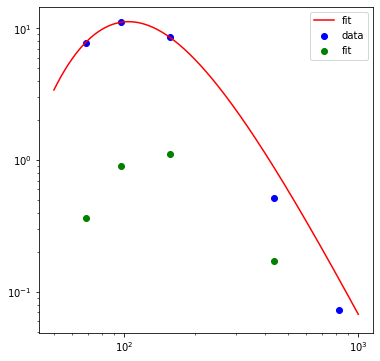

In [20]:
fig,axs = plt.subplots(figsize=(6,6))
array = np.linspace(50,1000,1000)
axs.scatter(data0['Rest_wavelength_um'],data0['Flux_density_Jy'],c='b',label='data')
axs.plot(array,Greybody(array,popt[0],popt[1]),c='r',label='fit')
axs.scatter(data0['Rest_wavelength_um'],Greybody(data0['Rest_wavelength_um'],31.2,10**8),c='g',label='fit')
axs.set_xscale('log')
axs.set_yscale('log')
axs.legend(numpoints=1,loc='best')
plt.show()

In [12]:
def GreybodyLambda(x,T,Nbb):
    '''Flux density in Jy/um^2 at wavelength x in micron
    given by an optically thick grey-body model
    T is the temperature of the grey body and
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-5))/(np.exp(14387.8/(x*T))-1)
    return flux

In [13]:
i2, abserr2 = quad(lambda x: GreybodyLambda(x,popt1[0],popt1[1]),8,1000)
#np.log10(3*(10**-12)*(i2*4*np.pi*(127.7*const.pc.value)**2))
i2

0.14967179909602857

In [18]:
np.log10(3*(10**8)*(10**-26)*(10**6)*i2*factor/const.L_sun.value)

11.359582053630124

## Schreiber 2017 SED templates

In [23]:
#from astropy.io import fits
from astropy.table import Table
import itertools

In [24]:
dusttable = Table.read('/home/bruno/Documents/COSMOamautas/Data/s17_dust.fits')

In [55]:
dusttable

"LAM [250,721]","SED [250,721]",UMIN [250],UMEAN [250],LIR [250],LFIR [250],L8 [250],TDUST [250],TDUST_LW [250],MASS_FRAC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.09877818422634621 .. 30000.000000000007,1.4424948503169463e-20 .. 3.64432208194104e-06,0.09999999999999998 .. 5000.0000000000055,0.26451371122875306 .. 12747.143156329044,50.76438621300392 .. 2403238.415655981,13.890889805991021 .. 348282.02713820856,1.7682513945842622 .. 250347.65146953752,14.307937881038514 .. 101.93537285161814,15.31383609466156 .. 109.1880022550492,0.97715


In [25]:
Dwl, DnuLnu = dusttable['LAM'],dusttable['SED']#micron, Lsun
Tdust = np.array(dusttable['TDUST'])[0]
fracPAH = np.arange(0.25, 6.25, 0.25)/100
idxs=[np.arange(len(Tdust)), np.arange(len(fracPAH))]

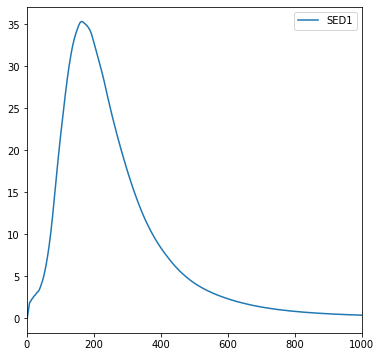

In [54]:
fig,axs = plt.subplots(figsize=(6,6))
axs.plot(Dwl[0][0],DnuLnu[0][0],label='SED1')
axs.legend(numpoints=1,loc='best')
axs.set_xlim(xmin=0,xmax=1000)
plt.show()

In [61]:
np.sum(DnuLnu[0][0][(Dwl[0][0]>8)&(Dwl[0][0]<1000)])

2268.770037222541

In [37]:
Dnu = (Dwl[0] * u.micron).to(u.Hz, equivalencies=u.spectral())

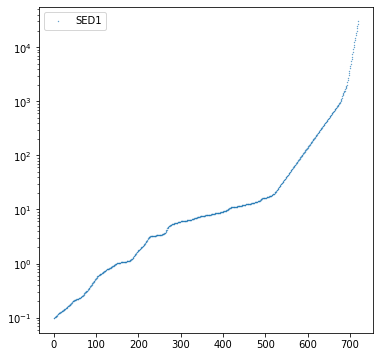

In [84]:
fig,axs = plt.subplots(figsize=(6,6))
#axs.plot(np.arange(307),Dwl[0][0][(Dwl[0][0]>8)&(Dwl[0][0]<1000)],label='SED1')
axs.scatter(np.arange(721),Dwl[0][0],label='SED1',s=0.1)
axs.legend(numpoints=1,loc='best')
axs.set_yscale('log')
#axs.set_xlim(xmin=0,xmax=1000)
plt.show()

In [30]:
FIRWL = Dwl[0][0][(Dwl[0][0]>8)&(Dwl[0][0]<1000)]
FIRWL

array([  8.03220429,   8.08261955,   8.13335125,   8.18440137,
         8.23577192,   8.2874649 ,   8.31343294,   8.33948234,
         8.36561337,   8.39182628,   8.41812132,   8.44449876,
         8.47095884,   8.49750184,   8.5241557 ,   8.55089316,
         8.57768662,   8.60456404,   8.61804831,   8.63155371,
         8.65859992,   8.68575909,   8.74027648,   8.79513605,
         8.85033996,   8.90589037,   8.96178944,   9.01803938,
         9.07464237,   9.13160064,   9.18891642,   9.24659195,
         9.30462948,   9.3630313 ,   9.42173747,   9.48081173,
         9.54025639,   9.60007376,   9.66026619,   9.72083602,
         9.84311739,  10.09231412,  10.21926843,  10.34781973,
        10.47798812,  10.60979393,  10.74339965,  10.81083211,
        10.87868782,  10.94696943,  10.98127079,  11.05019628,
        11.08482109,  11.1195544 ,  11.15439653,  11.18934784,
        11.20686455,  11.21563318,  11.22440867,  11.25957936,
        11.27720601,  11.29486025,  11.3302517 ,  11.36

In [31]:
FIRSED = GreybodyPL(FIRWL,popt1[0],popt1[1])*u.Jansky

In [32]:
Dfreq = (FIRWL * u.micron).to(u.Hz, equivalencies=u.spectral())

In [35]:
Lfreq = Dfreq*FIRSED

In [36]:
np.sum(Lfreq)

<Quantity 3.18611097e+15 Hz Jy>

In [38]:
(np.sum(Lfreq)*factor*(u.meter)**2).si#10**-26

<Quantity 6.21661034e+39 J / s>

In [39]:
const.L_sun.si

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [40]:
(np.sum(Lfreq)*factor*(u.meter)**2).si/const.L_sun.si#10**-26

<Quantity 1.62398389e+13 J / (s W)>

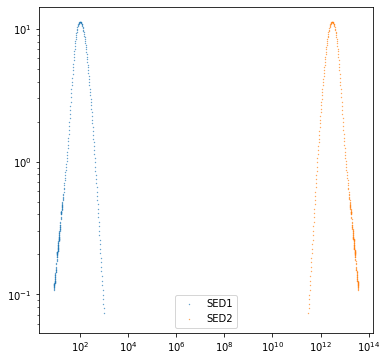

In [98]:
fig,axs = plt.subplots(figsize=(6,6))
axs.scatter(FIRWL,FIRSED,label='SED1',s=0.1)
axs.scatter(Dfreq,FIRSED,label='SED2',s=0.1)
axs.legend(numpoints=1,loc='best')
axs.set_xscale('log')
axs.set_yscale('log')
#axs.set_xlim(xmin=0,xmax=1000)
plt.show()

In [42]:
DnuLnu[0][0]

array([1.44249485e-20, 2.65403827e-20, 4.83187520e-20, 8.72878278e-20,
       1.56478092e-19, 2.78387416e-19, 4.91604005e-19, 1.50102131e-18,
       4.45181481e-18, 1.28198054e-17, 3.58139405e-17, 5.92075376e-17,
       9.69229944e-17, 1.57616698e-16, 2.54647215e-16, 4.08763722e-16,
       6.51984900e-16, 1.03339505e-15, 1.62628118e-15, 2.54366408e-15,
       3.95450714e-15, 6.11121883e-15, 9.39195386e-15, 1.43436022e-14,
       2.17803570e-14, 3.28859168e-14, 4.94366952e-14, 7.39072782e-14,
       1.09888898e-13, 1.62509750e-13, 2.39076096e-13, 5.16239972e-13,
       7.58153690e-13, 1.60936761e-12, 3.35216487e-12, 4.81033000e-12,
       7.00461019e-12, 1.01571067e-11, 1.46602482e-11, 2.10697681e-11,
       4.28740205e-11, 8.66019036e-11, 1.73867919e-10, 3.43287850e-10,
       6.64163857e-10, 9.17073260e-10, 1.25835187e-09, 1.71994028e-09,
       2.34190146e-09, 3.17679506e-09, 3.69316439e-09, 4.28947177e-09,
       4.97749464e-09, 5.77061603e-09, 6.66130776e-09, 7.68209687e-09,
      

In [39]:
DLnu= np.array(DnuLnu[0])/Dnu

In [38]:
Dnu

<Quantity [[3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09],
           [3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09],
           [3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09],
           ...,
           [3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09],
           [3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09],
           [3.03500677e+15, 2.99730278e+15, 2.96006719e+15, ...,
            1.21139436e+10, 1.09610755e+10, 9.99308193e+09]] Hz>

In [40]:
DLnu

<Quantity [[4.75285546e-36, 8.85475530e-36, 1.63235322e-35, ...,
            7.71077045e-17, 5.72039105e-17, 4.34022358e-17],
           [5.40198423e-36, 1.00631755e-35, 1.85497762e-35, ...,
            7.89246318e-17, 5.85491551e-17, 4.44212056e-17],
           [6.15435391e-36, 1.14636725e-35, 2.11296959e-35, ...,
            8.09886984e-17, 6.00773793e-17, 4.55787744e-17],
           ...,
           [8.66520365e-31, 1.42260711e-30, 2.33131876e-30, ...,
            6.44610560e-16, 4.77484954e-16, 3.61815729e-16],
           [8.92344060e-31, 1.46426077e-30, 2.39830490e-30, ...,
            6.47091735e-16, 4.79322649e-16, 3.63208125e-16],
           [9.15275373e-31, 1.50137987e-30, 2.45822756e-30, ...,
            6.49722569e-16, 4.81271185e-16, 3.64684499e-16]] 1 / Hz>

From Laura and Gabriela's code

    elif modelsettings['STARBURST']=='S17':
        STARBURSTFdict_4plot = dict()
        STARBURST_LIRdict = dict()
        #Call object containing all starburst models
        dusttable = Table.read(path + 'models/STARBURST/s17_dust.fits')
        pahstable = Table.read(path + 'models/STARBURST/s17_pah.fits')
        Dwl, DnuLnu = dusttable['LAM'],dusttable['SED'] #micron, Lsun
        Pwl, PnuLnu = pahstable['LAM'],pahstable['SED'] #micron, Lsun
        Tdust = np.array(dusttable['TDUST'])[0] #K
        fracPAH = np.arange(0.25, 6.25, 0.25)/100
        idxs=[np.arange(len(Tdust)), np.arange(len(fracPAH))]
        par_idxs_combinations = np.array(list(itertools.product(*idxs)))
        Dnu= (Dwl[0] * u.micron).to(u.Hz, equivalencies=u.spectral())
        Pnu= (Pwl[0] * u.micron).to(u.Hz, equivalencies=u.spectral())
        DLnu= np.array(DnuLnu[0])/Dnu ###!!!*1e-6 #* u.Lsun.to(u.W)
        PLnu=np.array(PnuLnu[0])/Pnu ###!!!*1e-6 #* u.Lsun.to(u.W)
        #Construct dictionaries
        for c in par_idxs_combinations:
            t=c[0]
            fp=c[1]
            sb_nu0 = np.array(Dnu[t,:])[::-1]
            sb_Fnu0 = np.array( (1-fracPAH[fp]) * DLnu[t,:] + (fracPAH[fp]) * PLnu[t,:])[::-1]
            STARBURSTFdict_4plot[str(Tdust[t]), str(fracPAH[fp])] = np.log10(sb_nu0), renorm_template('SB',sb_Fnu0)
            STARBURST_LIRdict[str(Tdust[t]), str(fracPAH[fp])] = Lir[t]
        ## Name the parameters that compose the keys of the dictionary: STARBURSTFdict_4plot[key].
        ## Add the names in the same order as their values are arranged in the dictionary key above.
        parameters_names =['Tdust', 'fracPAH']
        parameters_types =['grid', 'grid']